# Коваленков Дмитрий 

# Исследуйте, как различные факторы влияют на красоту человека (красота измеряется по шкале от 1 до 5).

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Загрузите файл Beauty.csv.

Столбец looks - это красота человека.

In [2]:
df = pd.read_csv("beauty.csv")
df.head()
#your code here

,wage,exper,union,service,educ,looks,sex,race,status,health
0,5.73,30,no,no,14,4,female,white,married,good
1,4.28,28,no,no,12,3,female,white,married,good
2,7.96,35,no,no,10,4,female,white,single,good
3,11.57,38,no,no,16,3,male,white,married,good
4,11.42,27,no,no,16,3,male,white,married,good


In [3]:
df.tail()

,wage,exper,union,service,educ,looks,sex,race,status,health
1255,1.61,25,no,no,12,3,female,black,single,good
1256,1.68,4,no,no,12,2,female,white,married,good
1257,3.29,35,no,no,12,3,female,black,single,good
1258,2.31,15,no,no,10,3,female,black,married,good
1259,1.92,24,no,no,16,3,female,white,single,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage       1260 non-null float64
exper      1260 non-null int64
union      1260 non-null object
service    1260 non-null object
educ       1260 non-null int64
looks      1260 non-null int64
sex        1260 non-null object
race       1260 non-null object
status     1260 non-null object
health     1260 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 98.5+ KB


> Первые выводы:
> > 1. Пропусков нет
> > 2. Столбцы union nи serice неинформативные

## Проведите однофакторный анализ

А именно, исследуйте влияние каждого фактора в отдельности на красоту человека.

Исследование проводите по аналогии с исследованием в ноутбуке Seminar1.ipynb.

In [6]:
df.head(1)

,wage,exper,union,service,educ,looks,sex,race,status,health
0,5.73,30,no,no,14,4,female,white,married,good


In [39]:
df.wage.skew(), df.wage.kurtosis()

(4.8192044939496546, 51.22120116313635)

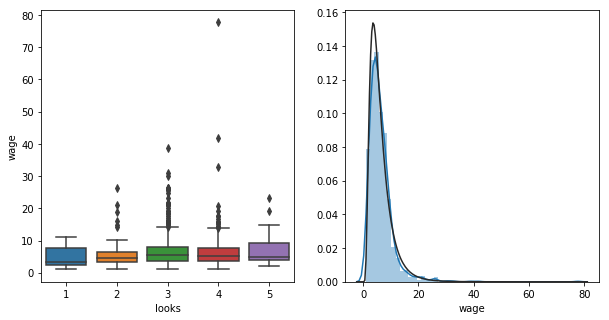

In [121]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.boxplot(x = 'looks', y = 'wage', data=df, ax=ax[0])
sns.distplot(df['wage'], fit = st.lognorm, ax=ax[1])
#ax[1].set_xlim(20,30)

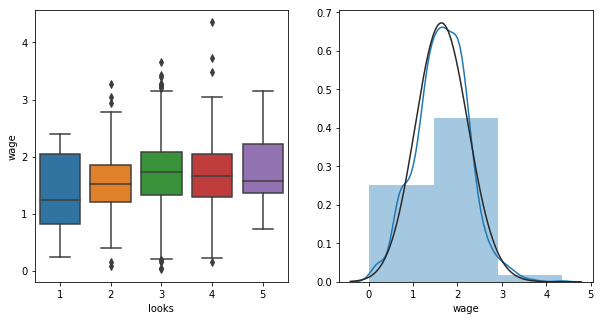

In [107]:
# Много выбросов, большое смещение, попробуем логарифмировать

c = df.copy()
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
c['wage'] = np.log(c['wage'])
sns.boxplot(x = 'looks', y = 'wage', data=c, ax=ax[0])
sns.distplot(c['wage'], fit = st.lognorm, ax=ax[1])

> > 1. Возможно стоит разбить доход на категории
> > 2. Или удалить выбросы (wage > 18)

In [74]:
c = df.copy()
c.mean(),c.std()

(wage      6.306690
 exper    18.206349
 educ     12.563492
 looks     3.185714
 dtype: float64, wage      4.660639
 exper    11.963485
 educ      2.624489
 looks     0.684877
 dtype: float64)

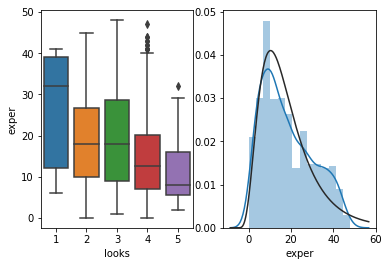

In [120]:
fig, ax = plt.subplots(1,2)
sns.boxplot(x = 'looks', y = 'exper', data=df, ax=ax[0])
sns.distplot(df['exper'], fit = st.lognorm, ax=ax[1])

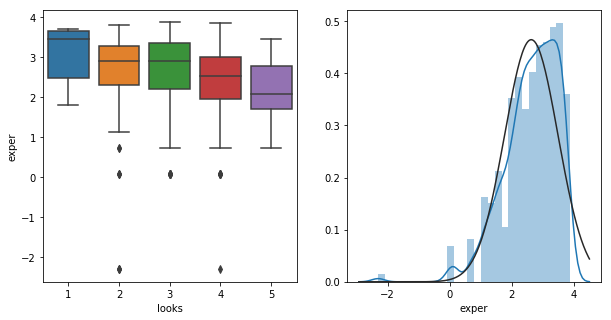

In [124]:
c = df.copy()
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
c['exper'] = np.log(c['exper']+0.1)
sns.boxplot(x = 'looks', y = 'exper', data=c, ax=ax[0])
sns.distplot(c['exper'], fit = st.lognorm, ax=ax[1])

> > Можно разбить на категории тоже

In [130]:
df.union.value_counts()

no    1260
Name: union, dtype: int64

In [131]:
df.service.value_counts()

no    1260
Name: service, dtype: int64

> > Неинформативные признаки, можно удалять

In [135]:
df.educ.value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

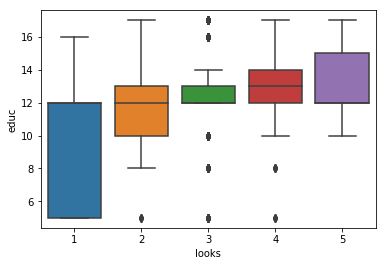

In [139]:
sns.boxplot(x = 'looks', y = 'educ', data=df)

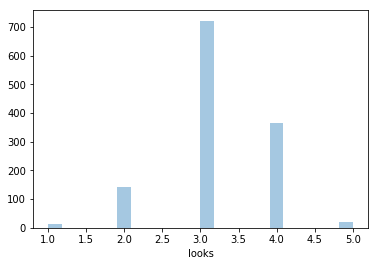

In [143]:
## Распределение целевой переменной
sns.distplot(df['looks'], kde = False)

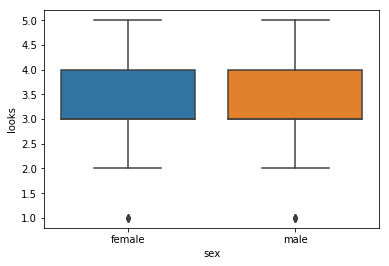

In [146]:
sns.boxplot(y = 'looks', x = 'sex', data=df)

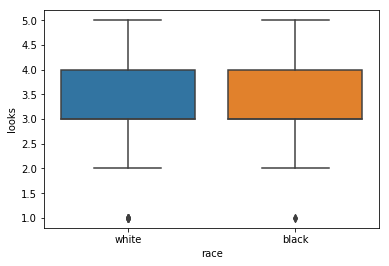

In [155]:
sns.boxplot(y = 'looks', x = 'race', data=df)

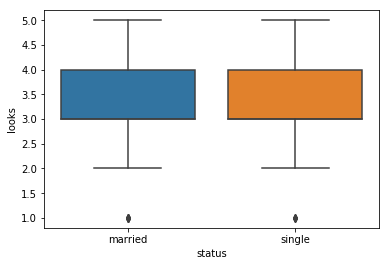

In [156]:
sns.boxplot(y = 'looks', x = 'status', data=df)

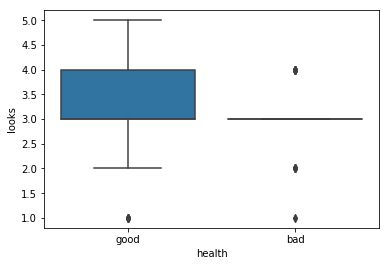

In [157]:
sns.boxplot(y = 'looks', x = 'health', data=df)

# Машинное обучение

1. Закодируйте все категориальные признаки с помощью OneHotEncoding.

2. Разбейте данные на train и test.

3. Обучите несколько алгоритмов классификации на полученных данных и выведите на экран качество (accuracy) каждого алгоритма на train и test.

In [203]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

In [292]:
df.educ.mean()

12.563492063492063

In [326]:
data = df.copy()
data = data[data.wage <18]


target = data.looks

del data['union'], data['service'], data['looks']

data.sex = data.sex.apply(lambda x: 1 if x == 'male' else 0)
data.race = data.race.apply(lambda x: 1 if x == 'white' else 0)
data.status = data.status.apply(lambda x: 1 if x == 'married' else 0)
data.health = data.health.apply(lambda x: 1 if x == 'bad' else 0)
data.exper = data.exper.apply(lambda x: 1 if x <=18 else 0)
data.wage = data.wage.apply(lambda x: 1 if x <=6.3 else 0)
data.educ = data.educ.apply(lambda x: 1 if x <=12.56 else 0)



In [327]:
data.head()

,wage,exper,educ,sex,race,status,health
0,1,0,0,0,1,1,0
1,1,0,1,0,1,1,0
2,0,0,1,0,1,0,0
3,0,0,0,1,1,1,0
4,0,0,0,1,1,1,0


In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1259
Data columns (total 7 columns):
wage      1229 non-null int64
exper     1229 non-null int64
educ      1229 non-null int64
sex       1229 non-null int64
race      1229 non-null int64
status    1229 non-null int64
health    1229 non-null int64
dtypes: int64(7)
memory usage: 76.8 KB


In [334]:
m = LogisticRegression()
xtr, xtst, ytr, ytst = train_test_split(data, target, random_state = 1108)
m.fit(xtr, ytr)

accuracy_score(ytst, m.predict(xtst))

C:\Users\AACE~1\AppData\Local\conda\conda\envs\virtual\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AACE~1\AppData\Local\conda\conda\envs\virtual\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5844155844155844

In [370]:
a = target.unique()

### Для каждой категории looks свои значимые признаки, посмотрим на них в матрице

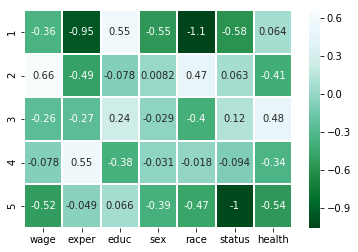

In [378]:

ax = plt.subplot()
sns.heatmap(pd.DataFrame(m.coef_, columns=data.columns, index=[1,2,3,4,5]), annot=True, lw=1, cmap='BuGn_r')


# Модель работает отвратительно
## Ставит всем тройки в тупую и все
#### Возведение в квадрат, перемножение, логарифмирование признаков особого результата не дало


In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression() #LinearSVC() и т.д.

In [331]:
m = LinearSVC()
xtr, xtst, ytr, ytst = train_test_split(data, target, random_state = 1108)
m.fit(xtr, ytr)

accuracy_score(ytst, m.predict(xtst))

0.5844155844155844

In [332]:
m = DecisionTreeClassifier()
xtr, xtst, ytr, ytst = train_test_split(data, target, random_state = 1108)
m.fit(xtr, ytr)

accuracy_score(ytst, m.predict(xtst))

0.5487012987012987

In [333]:
m = RandomForestClassifier()
xtr, xtst, ytr, ytst = train_test_split(data, target, random_state = 1108)
m.fit(xtr, ytr)

accuracy_score(ytst, m.predict(xtst))

C:\Users\AACE~1\AppData\Local\conda\conda\envs\virtual\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5616883116883117

### Алгоритмы, которые вы можете попробовать

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression() #LinearSVC() и т.д.

# Сделайте выводы

1. Какой или какие факторы больше всего влияют на красоту человека? 

*Выше визуализация матрицы, для каждого уровня красоты разные факторы*
2. Какой алгоритм сработал лучше всего?

*Все работают одинаково плохо. Можно слепо поставить всем 3 и получить результат не хуже алгоритмов*
3. Какой алгоритм больше всего переобучился? (качество на test гораздо ниже, чем качество на train, при этом качество на train достаточно высокое; качество сильно меняется при различных разбиениях на train и test).

*Вообще, решающее дерево склонно к переобучению*